# Contenido del proyecto <a id='back'></a>

* [Introducción](#intro)
* [Información general de los datos](#info)
* [Conversión de tipos de datos](#datos)
* [Análisis de la información](#analisis)
* [Conclusiones](#conclusiones)

# Introducción <a id='intro'></a>

El proyecto se realiza con el objetivo de identificar opciones para optimizar los gastos de marketing en el departamento analítico de Y.Afisha. Para el análisis de los datos se cuenta con registros de visitas de la plataforma Y.Afisha en el periodo de enero del 2017 hasta diciembre de 2018, información de los pedidos durante éste periodo y respectivas estadísticas de gastos en marketing.

# Información general de los datos <a id='info'></a> 

In [583]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [584]:
visits=pd.read_csv('/datasets/visits_log_us.csv') # se cargan los datos de las visitas a la plataforma.

In [585]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


En la tabla "visits" no se identifican valores ausentes.

Se encuentra que en el caso de las columnas "Start Ts" y "End Ts" se encuentra en formato object; lo cual no se considera apropiado, ya que éstas deben encontrarse en formato fecha.

In [586]:
visits.head(10) #se cargan las diez primeras filas para visualizar el contenido de la tabla.

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Revisamos la existencia de datos duplicados.

In [587]:
visits.duplicated().sum()

0

No se identifican valores duplicados en el Dataframe Visits.

Para facilitar la manipulación de la información, renombramos los nombres de las columnas.

In [588]:
visits=visits.rename(columns={
    'Device':'device',
    'End Ts':'end_ts',
    'Source Id':'source_id',
    'Start Ts':'start_ts',
    'Uid':'uid'
})

Revisamos nuevamente el Dataframe para validar los nombres de las columnas.

In [589]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [590]:
orders= pd.read_csv('/datasets/orders_log_us.csv')

In [591]:
orders.info() #se cargan los datos de la tabla "orders", que contiene los datos sobre los pedidos de los usuarios.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


En la tabla orders, no se identifican datos ausentes.

Los datos de la columna "Buys Ts" se encuentran en tipo object. Se considera que ésta columna debe encontrarse en tipo fecha para facilitar la manipulación de la información.

In [592]:
orders.head(10) #se cargan las diez primeras filas para visualizar el contenido de la tabla.

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Revisamos la existencia de valores duplicados.

In [593]:
orders.duplicated().sum()

0

No se identifican valores duplicados en el Dataframe orders.

Cambiamos el nombre de las columnas del dataframe orders para facilitar la manipulación de información y prevenir errores.

In [594]:
orders=orders.rename(columns={
    'Buy Ts':'buy_ts',
    'Revenue':'revenue',
    'Uid':'uid'
})

Revisamos nuevamente los nombres de las columnas del Dataframe orders.

In [595]:
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [596]:
costs= pd.read_csv('/datasets/costs_us.csv') # se carga la información de los gastos de marketing

In [597]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


No se identifican datos usentes en el Dataframe costs.

Los datos de la columna "dt" se encuentran en formato object. Se decide cambiar el dato a tipo fecha para facilitarla manipulación de datos y prevenir posibles errores en el análisis.

Se verifican posibles datos duplicados en la tabla costs.

In [598]:
costs.duplicated().sum()

0

No se identifican datos duplicadfos en el Dataframe costs.

Para el Dataframe costs, no se renombran las columnas.

In [599]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


# Conversión de tipos de datos <a id='datos'></a> 

**Convertimos los datos de la tabla Visits.**

In [600]:
visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [601]:
visits['start_ts']=pd.to_datetime(visits['start_ts'],format='%Y.%m.%d %H:%M:%S') # el tipo de dato de la columna Start Ts se convierte a tipo fecha

In [602]:
visits['end_ts']=pd.to_datetime(visits['end_ts'],format='%Y.%m.%d %H:%M:%S') #El tipo de dato de la columna End Ts se convierte a formato fecha

In [603]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


**Convertimos los datos de la tabla Orders.**

In [604]:
orders['buy_ts']= pd.to_datetime(orders['buy_ts'],format='%Y.%m.%d %H:%M:%S') # el tipo de dato de la columna Buys Ts se cambia a tipo fecha.

In [605]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


**Convertimos los datos de la tabla costs.**

In [606]:
costs['dt']= pd.to_datetime(costs['dt'],format='%Y.%m.%d %H:%M:%S') #convertimos el tipo de dato de la columna dt a tipo fecha.

In [607]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# Análisis de la información <a id='analisis'></a> 

# Cálculo de métricas.

**Calculamos inicialmente, el número de usuarios activos diarios (DAU).**

In [608]:
visits['visits_day']=visits['start_ts'].astype('datetime64[D]')

In [609]:
dau_visits=visits.groupby('visits_day').agg({'uid':'nunique'}).mean()

In [610]:
int(dau_visits) # el resultado del número de usuarios activos por día, se pasa a tipo entero.

907

El número de usuarios diarios en promedio es de 907 usuarios.

Generamos un gráfico de líneas para identificar la variación en el tiempo en el número de usuarios activos diarios.

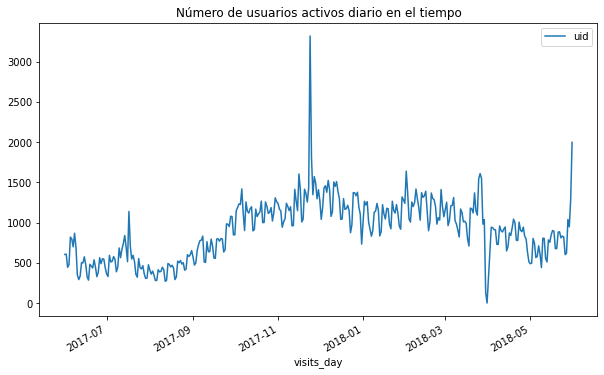

In [611]:
visits.groupby('visits_day',).agg({'uid':'nunique'}).plot(kind='line',figsize=(10,6))
plt.title('Número de usuarios activos diario en el tiempo')
plt.show()

El mayor número de visitas diarias se reportaron en los días del mes de noviembre del año 2017.

**Calculamos  el número de usuarios activos semanal (WAU).**

In [612]:
visits['visits_week']=visits['start_ts'].astype('datetime64[W]')

In [613]:
wau_visits=visits.groupby('visits_week').agg({'uid':'nunique'}).mean()

In [614]:
int(wau_visits)

5724

El número de usuarios activos a la semana, es de 5724 en promedio.

Generamos un gráfico de líneas que nos permita visualizar la variación de las visitas semanales por parte de los usuarios en el tiempo.

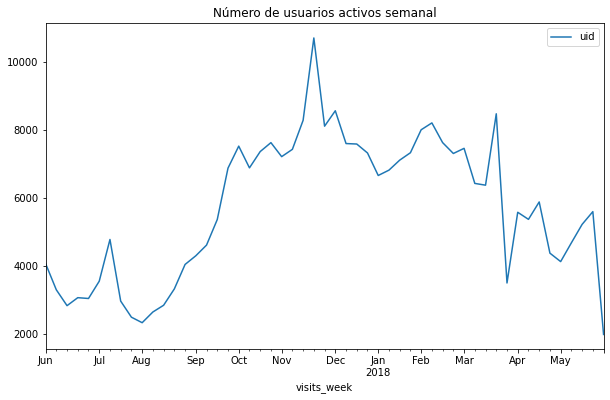

In [615]:
visits.groupby('visits_week',).agg({'uid':'nunique'}).plot(kind='line',figsize=(10,6))
plt.title('Número de usuarios activos semanal')
plt.show()

De acuerdo con el gráfico de líneas, la mayor cantidad de visitas semanales se realizan en los meses de noviembre y marzo. El menor número de visitas por el contrario se realizan en el mes de junio.

**Calculamos el número de usuarios activos mensual (MAU).**

In [616]:
visits['visits_month']=visits['start_ts'].astype('datetime64[M]')

In [617]:
mau_visits=visits.groupby('visits_month').agg({'uid':'nunique'}).mean()

In [618]:
int(mau_visits)

23228

El número de usuarios promedio activos en el mes es de apróximadamente 23228 usuarios.

Generamos un gráfico que nos muestre la variación en el tiempo de las visitas mensuales por parte de los usuarios.

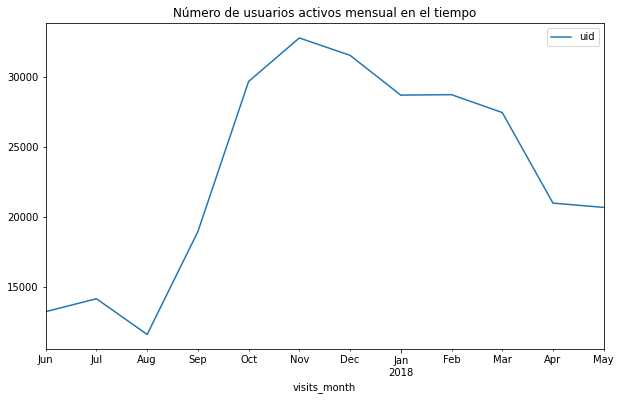

In [619]:
visits.groupby('visits_month',).agg({'uid':'nunique'}).plot(kind='line',figsize=(10,6))
plt.title('Número de usuarios activos mensual en el tiempo')
plt.show()

De acuerdo con el gráfico de líneas, la mayor cantidad de visitas mensual por parte de los usuarios se realizan entre los meses de noviembre y diciembre. La manor cantidad de visitas mensuales se realizan en el mes de junio.

**Ahora, calculamos el número de sesiones por día.**

In [620]:
visits_session_d=visits.groupby('visits_day').agg({'uid':['count','nunique']}) # identificamos el número de visitas diarias por usuario.

In [621]:
visits_session_d.columns=['n_sessions','n_users'] # Renombrados las columnas.

In [622]:
visits_session_d['visits_session_d']=visits_session_d['n_sessions']/visits_session_d['n_users'] #Calculamos el promedio de sesiones por usuario al día.

In [623]:
visits_session_d['visits_session_d']

visits_day
2017-06-01    1.097521
2017-06-02    1.082237
2017-06-03    1.071910
2017-06-04    1.071429
2017-06-05    1.089024
                ...   
2018-05-27    1.083871
2018-05-28    1.112608
2018-05-29    1.091772
2018-05-30    1.093871
2018-05-31    1.129695
Name: visits_session_d, Length: 364, dtype: float64

Graficamos la variación del promedio de número de sesiones por día por parte de los usuarios.

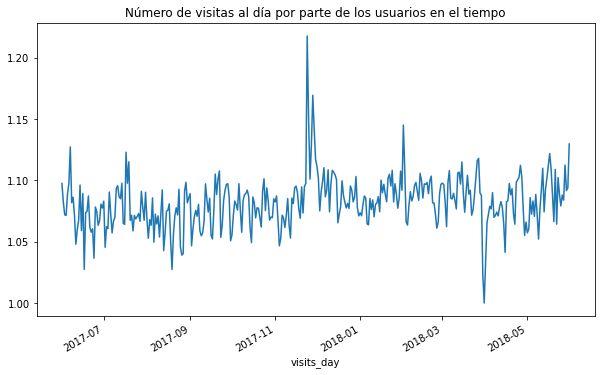

In [624]:
visits_session_d['visits_session_d'].plot(kind='line',figsize=(10,6))
plt.title('Número de visitas al día por parte de los usuarios en el tiempo')
plt.show()

El mayor número de sesiones por día por parte de los usuarios se reportan entre los meses de noviembre y diciembre del 2017 y febrero 2018.

De acuerdo con los gráficos, se concluye entonces que la temporada alta de visitas por parte de los usuarios es en el mes de noviembre.

**Calculamos la duración promedio de cada sesión.**

In [625]:
visits['start_ts']= pd.to_datetime(visits['start_ts'],format='%Y.%m.%d %H:%M:%S') #pasamos la columna Start Ts a formato fecha y hora.

In [626]:
visits['end_ts']= pd.to_datetime(visits['end_ts'], format='%Y.%m.%d %H:%M:%S') #pasamos la columna End Ts a formato fecha y hora.

In [627]:
visits['session_duration_sec']=(visits['end_ts']-visits['start_ts']).dt.seconds

In [628]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

La duración promedio de cada sesión es de 643.5 segundos; sin embargo, la desviación estándar se considera muy alta(1016.3), lo cual puede atribuirse a la cantidad de datos que reportan un valor de cero (0).

**Generamos el histograma para visualizar la duración de las sesiones.**

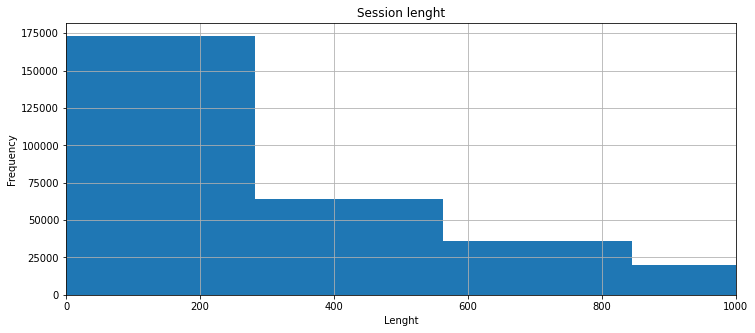

In [629]:
plt.figure(figsize=(12,5))
visits['session_duration_sec'].hist(bins=300).set(title = 'Session lenght', xlabel = 'Lenght', ylabel = 'Frequency')
plt.xlim(0,1000)
plt.show()

**Calculamos la moda de la duración de las sesiones, debido a la diferencia entre las distribuciones de éste dato.**

In [630]:
visits['session_duration_sec'].mode()[0]

60

De acuerdo al cálculo de la moda, podemos concluir que la mayoría de las sesiones duran apróximadamente 60 segundos (1 minuto), por lo cual se concluye que los usuarios abandonan muy rápido la sesión, es posible que la plataforma pida mucha información o sea dificil de usar.

**Ahora revisamos la frecuencia con la que los usuarios regresan a la plataforma, para lo cual hallaremos entonces la tasa de retención.**

In [631]:
visits['start_ts']

0        2017-12-20 17:20:00
1        2018-02-19 16:53:00
2        2017-07-01 01:54:00
3        2018-05-20 10:59:00
4        2017-12-27 14:06:00
                 ...        
359395   2017-07-29 19:07:00
359396   2018-01-25 17:38:00
359397   2018-03-03 10:12:00
359398   2017-11-02 10:12:00
359399   2017-09-10 13:13:00
Name: start_ts, Length: 359400, dtype: datetime64[ns]

In [632]:
first_visits=visits.groupby('uid')['start_ts'].min().reset_index() # Generamos un nuevo Dataframe con las primeras visitas de los usuarios.

In [633]:
first_visits=first_visits.rename(columns={'uid':'uid',
                                         'start_ts':'first_session_start_ts'})

In [634]:
first_visits['first_session_dt']=first_visits['first_session_start_ts'].dt.date #Extraemos la fecha de la primera visita.

In [635]:
first_visits['first_session_month']=first_visits['first_session_start_ts'].astype('datetime64[M]') #Extraemos el mes de la fecha de la primera visita.

In [636]:
visits_full=pd.merge(visits,first_visits,on='uid') #Unimos el Dataframe de las primeras visitas, con el Dataframe inicial.

In [637]:
visits_full['age_months']=((visits_full['visits_month']-visits_full['first_session_month'])/np.timedelta64(1,'M')).round().astype('int')

In [638]:
cohorts=visits_full.pivot_table(index='first_session_month',
                               columns='age_months',
                               values='uid',
                               aggfunc='nunique')

In [639]:
cohorts.fillna('')

age_months,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [640]:
retention=pd.DataFrame() 
for col in cohorts.columns:
    
    retention=pd.concat([retention,cohorts[col]/cohorts[0]],axis=1)

In [641]:
retention.columns=cohorts.columns #Renombramos las columnas de "retention"

In [642]:
retention.index=[str(x)[0:10] for x in retention.index] #Renombramos el índice de "retention".

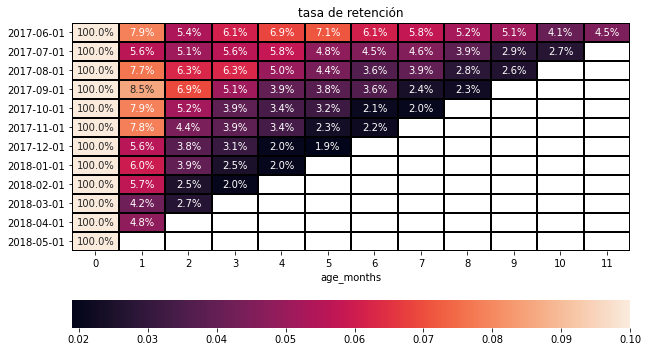

In [643]:
plt.figure(figsize=(10,6))
sns.heatmap(retention,annot=True, fmt='.1%',linewidths=1,linecolor='black',vmax=0.1, cbar_kws={'orientation':'horizontal'}).set(title='tasa de retención')
plt.show()

En general, la tasa de retención de la empresa se considera baja; ya que para todas las cohortes ésta tasa de retención es menor al 10% y tiene tendencia a disminuir en cada nueva cohorte. 

**Revisamos el momento en el que los usuarios visitan la plataforma.**

In [644]:
first_visits_user=visits.groupby('uid')['start_ts'].min().reset_index().rename(columns={'start_ts':'first_visit'})

In [645]:
first_visits_user

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [646]:
orders['buy_date']= pd.to_datetime(orders['buy_ts'].dt.date) #Extraemos la fecha de la primera compra.

**Ahora revisamos el momento en el que los usuarios realizan la primera compra.**

In [647]:
first_purchases=orders.groupby('uid')['buy_date'].min().reset_index().rename(columns={'buy_date':'first_purchases'})

In [648]:
time_first_purchases=first_visits_user.merge(first_purchases, on='uid',how='left')

In [649]:
time_first_purchases

,uid,first_visit,first_purchases
0,11863502262781,2018-03-01 17:27:00,NaT
1,49537067089222,2018-02-06 15:55:00,NaT
2,297729379853735,2017-06-07 18:47:00,NaT
3,313578113262317,2017-09-18 22:49:00,2018-01-03
4,325320750514679,2017-09-30 14:29:00,NaT
...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,NaT
228165,18446424184725333426,2017-12-06 20:32:00,NaT
228166,18446556406699109058,2018-01-01 16:29:00,NaT
228167,18446621818809592527,2017-12-27 13:27:00,NaT


In [650]:
time_first_purchases.isnull().sum()

uid                     0
first_visit             0
first_purchases    191646
dtype: int64

Se identifican datos nulos en la columna "first_purchases", lo cual puede atribuirse a que éstos usuarios no hicieron una compra.

Utilizamos el método dropna() para eliminar los datos nulos.

In [651]:
time_first_purchases.dropna(inplace=True)

In [652]:
time_first_purchases

,uid,first_visit,first_purchases
3,313578113262317,2017-09-18 22:49:00,2018-01-03
22,1575281904278712,2017-06-03 10:13:00,2017-06-03
35,2429014661409475,2017-10-11 17:14:00,2017-10-11
36,2464366381792757,2018-01-27 20:10:00,2018-01-28
38,2551852515556206,2017-11-24 10:14:00,2017-11-24
...,...,...,...
228142,18445147675727495770,2017-08-20 13:30:00,2017-11-24
228143,18445407535914413204,2017-09-22 23:48:00,2017-09-22
228148,18445601152732270159,2017-08-07 11:51:00,2018-03-26
228161,18446156210226471712,2017-11-07 10:01:00,2018-02-18


**Revisamos el tiempo que transcurre para realizar la primera compra.**

In [653]:
time_first_purchases['activity_purchases']=time_first_purchases['first_purchases']-time_first_purchases['first_visit']

In [654]:
time_first_purchases['activity_purchases']=time_first_purchases['activity_purchases']/np.timedelta64(1,'W')

In [655]:
time_first_purchases['activity_purchases']=time_first_purchases['activity_purchases'].astype(int)

In [656]:
time_first_purchases

,uid,first_visit,first_purchases,activity_purchases
3,313578113262317,2017-09-18 22:49:00,2018-01-03,15
22,1575281904278712,2017-06-03 10:13:00,2017-06-03,0
35,2429014661409475,2017-10-11 17:14:00,2017-10-11,0
36,2464366381792757,2018-01-27 20:10:00,2018-01-28,0
38,2551852515556206,2017-11-24 10:14:00,2017-11-24,0
...,...,...,...,...
228142,18445147675727495770,2017-08-20 13:30:00,2017-11-24,13
228143,18445407535914413204,2017-09-22 23:48:00,2017-09-22,0
228148,18445601152732270159,2017-08-07 11:51:00,2018-03-26,32
228161,18446156210226471712,2017-11-07 10:01:00,2018-02-18,14


Generamos un histograma para visualizar las semanas que transcurren para realizar la primera compra.

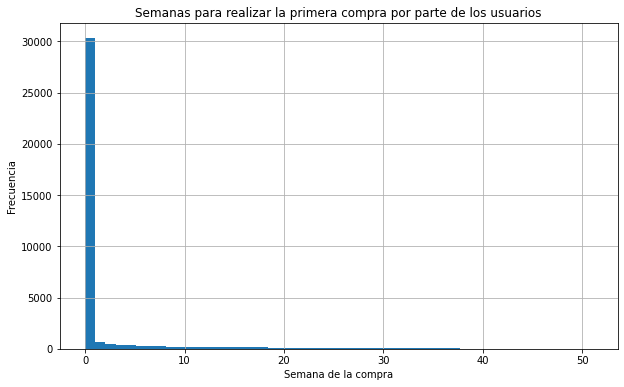

In [657]:
time_first_purchases['activity_purchases'].hist(bins=50,figsize=(10,6))
plt.title('Semanas para realizar la primera compra por parte de los usuarios')
plt.xlabel('Semana de la compra')
plt.ylabel('Frecuencia')
plt.show()

De acuerdo con el histograma que nos muestra las semanas que transcurren para realizar la primera compra, se evidencia que la mayoría de los usuarios realizan la compra en la misma fecha en la que realizan la visita (activity_pruchases=0). Para el caso en el que la fecha de compra, se realiza el mismo día de la primera visita.

**Hallamos el número de pedidos en un periodo de tiempo (al mes).**

In [658]:
orders['month_buy']=orders['buy_ts'].dt.month

In [659]:
orders['month_buy']

0        6
1        6
2        6
3        6
4        6
        ..
50410    5
50411    5
50412    5
50413    5
50414    6
Name: month_buy, Length: 50415, dtype: int64

In [660]:
orders_month_purchases=orders.groupby('month_buy').agg({'uid':['count','nunique']})

In [661]:
orders_month_purchases.columns=['order_month','n_order_users']

In [662]:
orders_month_purchases['order_per_user_month']=orders_month_purchases['order_month']/orders_month_purchases['n_order_users']

In [663]:
orders_month_purchases

,order_month,n_order_users,order_per_user_month
month_buy,,,
1,4721,3898,1.211134
2,5281,4258,1.240254
3,5326,4181,1.273858
4,3273,2744,1.192784
5,4346,3544,1.226298
6,2355,2024,1.163538
7,2363,1984,1.191028
8,1807,1472,1.227582
9,3387,2750,1.231636


Generamos un gráfico de línea para visualizar el número de pedidos realizados cada mes.

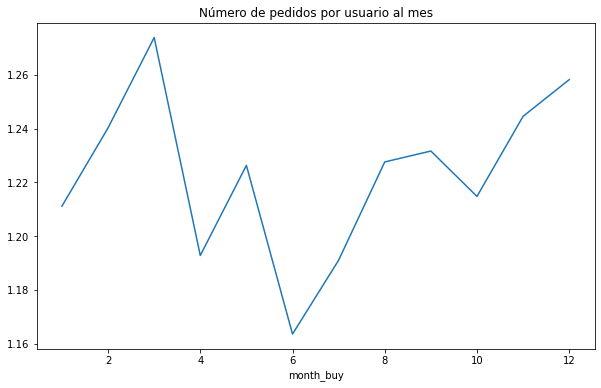

In [664]:
orders_month_purchases['order_per_user_month'].plot(kind='line',figsize=(10,6))
plt.title('Número de pedidos por usuario al mes')
plt.show()

De acuerdo al gráfico de línea, los mayores pedidos se realizan entre los meses de marzo y noviembre. La menor cantidad de pedidos por usuario se realiza en el mes de junio.

**Revisamos el número de pedidos promedio.**

In [665]:
orders_purchases_user_mean=orders_month_purchases['order_per_user_month'].mean()

In [666]:
orders_purchases_user_mean.astype(int)

1

En promedio, el número de pedidos realizados por parte de los usuarios al mes es de 1 pedido.

**Revisamos cuánto dinero trae cada cliente (LTV).**

In [667]:
orders['buy_dt']=orders['buy_ts'].dt.date

In [668]:
orders['order_month']=orders['buy_ts'].astype('datetime64[M]') #Creamos nuevas columnas y convertimos al tipo dato tipo fecha.

In [669]:
first_orders=orders.groupby('uid').agg({'buy_ts':'min'}).reset_index().rename(columns={'buy_ts':'first_order_ts'}) #Buscamos el mes en el que se realizó la primera compra.

In [670]:
first_orders['first_order_dt']=first_orders['first_order_ts'].dt.date #Extraemos la fecha del primer pedido.

In [671]:
first_orders['first_order_month']=first_orders['first_order_ts'].astype('datetime64[M]') #Extraemos el mes del primer pedido.

In [672]:
buyers=pd.merge(first_visits,first_orders,on='uid')

In [673]:
buyers['first_order_dt']=pd.to_datetime(buyers['first_order_dt']) #Convertimos la columna que contiene la primera fecha de compra a formato tipo fecha.

In [674]:
buyers['first_session_dt']=pd.to_datetime(buyers['first_session_dt']) #Convertimos la columna que contiene la primera fecha de sesion a formato tipo fecha.

In [675]:
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) / np.timedelta64(1,'D')).astype('int')

In [676]:
buyers['first_order_ts']

0       2018-01-03 21:51:00
1       2017-06-03 10:13:00
2       2017-10-11 18:33:00
3       2018-01-28 15:54:00
4       2017-11-24 10:14:00
                ...        
36518   2017-11-24 09:03:00
36519   2017-09-22 23:55:00
36520   2018-03-26 22:54:00
36521   2018-02-18 19:34:00
36522   2017-10-17 10:16:00
Name: first_order_ts, Length: 36523, dtype: datetime64[ns]

In [677]:
buyers['first_session_start_ts']

0       2017-09-18 22:49:00
1       2017-06-03 10:13:00
2       2017-10-11 17:14:00
3       2018-01-27 20:10:00
4       2017-11-24 10:14:00
                ...        
36518   2017-08-20 13:30:00
36519   2017-09-22 23:48:00
36520   2017-08-07 11:51:00
36521   2017-11-07 10:01:00
36522   2017-10-17 10:05:00
Name: first_session_start_ts, Length: 36523, dtype: datetime64[ns]

In [678]:
cohort_sizes=buyers.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

In [679]:
cohort_sizes.columns=['first_order_month','n_buyers']

In [680]:
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [681]:
cohorts=pd.merge(orders,buyers,on='uid',how='inner').groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index() 

In [682]:
cohorts['age_month']=((cohorts['order_month']-cohorts['first_order_month'])/np.timedelta64(1,'M')).round().astype('int')

In [683]:
cohorts

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2
75,2018-04-01,2018-04-01,10600.69,0
76,2018-04-01,2018-05-01,1209.92,1
77,2018-05-01,2018-05-01,13925.76,0


In [684]:
cohorts_report=pd.merge(cohort_sizes,cohorts,on='first_order_month')

In [685]:
cohorts_report

,first_order_month,n_buyers,order_month,revenue,age_month
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,0


In [686]:
cohorts_report['ltv']=cohorts_report['revenue']/cohorts_report['n_buyers']

In [687]:
cohorts_ltv=cohorts_report.pivot_table(index='first_order_month',
                                     columns='age_month',
                                     values='ltv',
                                     aggfunc='sum')

In [688]:
cohorts_ltv.cumsum(axis=1).round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


Generamos un mapa de calor, para mejorar el análisis de los datos.

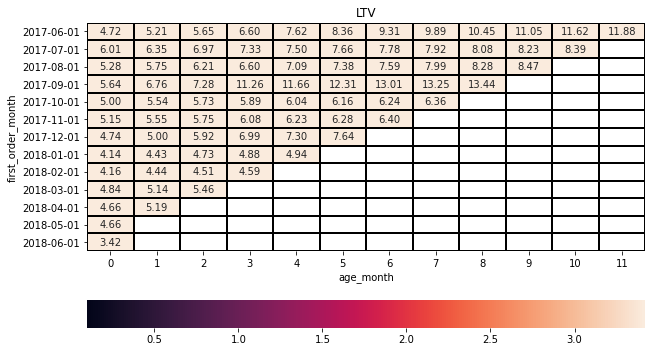

In [689]:
plt.figure(figsize=(10,6))
sns.heatmap(cohorts_ltv.cumsum(axis=1),annot=True, fmt='.2f',linewidths=1,linecolor='black',vmax=0.1, cbar_kws={'orientation':'horizontal'}).set(title='LTV',yticklabels=cohorts_ltv.index.astype('str'))
plt.show()

De acuerdo al LTV acumulado para cada cohorte, los mayores ingresos totales por parte de los usuarios se registraron en las cohortes del mes de junio (2017) y septiembre (2018).

De acuerdo a la tabla dinámica que nos relaciona el LTV total para cada cohorte, identificamos que la cantidad de dinero aportado por los clientes generalmente va disminuyendo en el tiempo. Los LTV (no acumulados) mas bajos se reportan en los meses de octubre y noviembre (2017) y enero y febrero (2018).

**Hallamos el promedio del LTV.**

In [690]:
ltv_mean=cohorts_report['ltv'].sum()/12 #dividimos la suma de los ltv de las cohortes, entre el número de cohortes.

In [691]:
ltv_mean

7.568459989156722

El promedio de ingresos generados por los clientes (LTV) en cada cohorte, es de 7.56.

**Averiguamos la cantidad de dinero gastado en total, y dinero gastado por tipo de fuente en actividades de marketing.**

In [692]:
costs['costs'].sum() #dinero gastado en total en márketind.

329131.62

La cantidad de dinero gastado en total es de 329131.62

**Hallamos la cantidad de dinero gastado en marketing para cada fuente.**

In [693]:
costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

Hallamos la variación en los costos en marketing en el tiempo.

Extraemos el mes de la fecha de los costos de marketing.

In [694]:
costs['cost_month']=costs['dt'].astype('datetime64[M]')

In [695]:
cost_time=costs.groupby('cost_month')['costs'].sum()

In [696]:
cost_time

cost_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

Graficamos los costos realizados en el tiempo para identificar la variación de los costos.

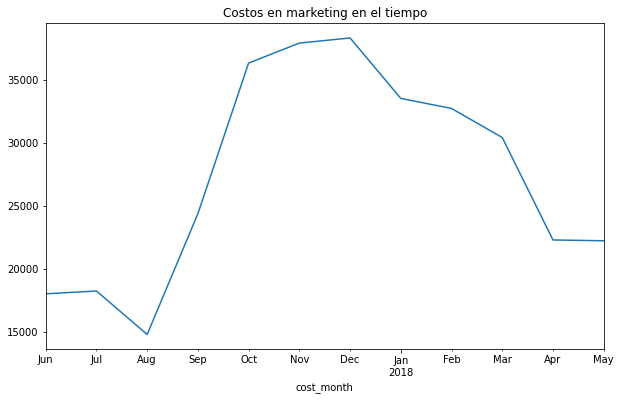

In [697]:
costs.groupby('cost_month')['costs'].sum().plot(kind='line',figsize=(10,6))
plt.title('Costos en marketing en el tiempo')
plt.show()

De acuerdo al diagrama de líneas, la mayor cantidad de costos se han reportado en el mes de diciembre, y por el contrario la menor cantidad de costos se reportan en el mes de agosto.

Graficamos los costos en marketing en cada fuente al mes.

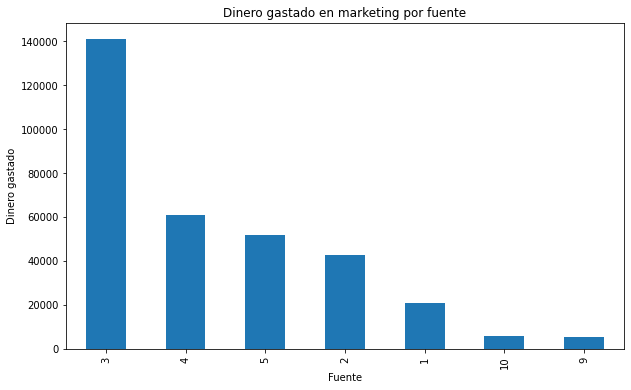

In [698]:
costs.groupby('source_id')['costs'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Dinero gastado en marketing por fuente')
plt.xlabel('Fuente')
plt.ylabel('Dinero gastado')
plt.show()

De acuerdo al diagrama de barras que nos muestra la cantidad de dinero gastado en marketing por cada fuente, evidenciamos que en la fuente 3 es en la que mas se ha invertido dinero. En la fuente 9 en la que menos se ha gastado dinero en actividades de marketing.

**Ahora hallamos los costos por mes por fuente.**

In [699]:
costos_mes_fuente=costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index()

In [700]:
costos_mes_fuente.head(10)

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


In [701]:
df=px.area(costos_mes_fuente,x='cost_month',y='costs',color='source_id',line_group='source_id')

In [702]:
df

De acuerdo al gráfico, la fuente en la que mas se generan gastos por mes es en la fuente 3, teniendo los mayores gastos en el mes de noviembre del 2017.

**Revisamos el costo de adquisición de clientes para cada fuente.**

In [703]:
visits.info() #Revisamos que las columnas del dataframe "Visits" se encuentren en los formatos adecuados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   device                359400 non-null  object        
 1   end_ts                359400 non-null  datetime64[ns]
 2   source_id             359400 non-null  int64         
 3   start_ts              359400 non-null  datetime64[ns]
 4   uid                   359400 non-null  uint64        
 5   visits_day            359400 non-null  datetime64[ns]
 6   visits_week           359400 non-null  datetime64[ns]
 7   visits_month          359400 non-null  datetime64[ns]
 8   session_duration_sec  359400 non-null  int64         
dtypes: datetime64[ns](5), int64(2), object(1), uint64(1)
memory usage: 24.7+ MB


In [704]:
visits=visits.rename(columns={'end_ts':'session_end_ts',
                             'start_ts':'session_start_ts'})

In [705]:
visits['session_month']=visits['session_start_ts'].astype('datetime64[M]') #Extraemos el mes de inicio de sesión.

In [706]:
visits['session_week']=visits['session_start_ts'].dt.isocalendar().week #Extraemos la semana del inicio de sesión.

In [707]:
visits['session_date']=visits['session_start_ts'].dt.date #Extraemos la fecha de los inicios de sesion.

In [708]:
first_visit=visits.groupby('uid').agg({'session_start_ts':'min'}).reset_index() # Obtenemos información de la primera sesión de cada usuario.

In [709]:
first_visit=first_visit.rename(columns={'session_start_ts':'first_session_start_ts',
                       'uid':'uid'
})

In [710]:
first_visit['first_session_dt']=first_visit['first_session_start_ts'].dt.date #Obtenemos la fecha de la primera sesión.

In [711]:
first_visit['first_session_month']= first_visit['first_session_start_ts'].astype('datetime64[M]') #Obtenemos el mes de la primera sesión.

In [712]:
first_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228169 entries, 0 to 228168
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   uid                     228169 non-null  uint64        
 1   first_session_start_ts  228169 non-null  datetime64[ns]
 2   first_session_dt        228169 non-null  object        
 3   first_session_month     228169 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1), uint64(1)
memory usage: 7.0+ MB


In [713]:
full_visits=pd.merge(visits,first_visit,on='uid')

In [714]:
full_visits['age_months']=(full_visits['session_month']-full_visits['first_session_month'])/np.timedelta64(1,'M').astype(int)

Unimos la información de los costos en marketing por fuente, con el reporte de las cohortes.

In [715]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   buy_ts       50415 non-null  datetime64[ns]
 1   revenue      50415 non-null  float64       
 2   uid          50415 non-null  uint64        
 3   buy_date     50415 non-null  datetime64[ns]
 4   month_buy    50415 non-null  int64         
 5   buy_dt       50415 non-null  object        
 6   order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(1), uint64(1)
memory usage: 2.7+ MB


In [716]:
orders['buy_dt']=orders['buy_ts'].dt.date #extremos la fecha de la columna buy_ts.

In [717]:
orders['buy_month']=orders['buy_ts'].astype('datetime64[M]') #Extraemos el mes de la fecha del pedido.

In [718]:
first_orders=orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()

In [719]:
first_orders=first_orders.rename(columns={'buy_ts':'first_order_ts',
                       'uid':'uid'
})

In [720]:
first_orders['first_order_dt']=first_orders['first_order_ts'].dt.date #Extraemos la fecha de la primera orden

In [721]:
first_orders['first_order_month']=first_orders['first_order_ts'].astype('datetime64[M]') #Extraemos el mes de la fecha de la primera orden

In [722]:
buyers=pd.merge(first_visit,first_orders,on='uid')

In [723]:
buyers['first_order_dt']=pd.to_datetime(buyers['first_order_dt'],format='%Y.%m.%d %H:%M:%S') #Convertimos la columna first_order_dt a formato fecha

In [724]:
buyers['first_session_dt']=pd.to_datetime(buyers['first_session_dt'],format='%Y.%m.%d %H:%M:%S')  #Convertimos la columna first_session_dt a formato fecha

In [725]:
buyers['days_to_first_purchase']=(buyers['first_order_dt']-buyers['first_session_dt'])/np.timedelta64(1,'D').astype(int)

Calculamos el CAC (costo de adquisición de clientes) por fuente de tráfico.

In [726]:
full_visits=full_visits.sort_values(by='session_start_ts')

In [727]:
full_visits

,device,session_end_ts,source_id,session_start_ts,uid,visits_day,visits_week,visits_month,session_duration_sec,session_month,session_week,session_date,first_session_start_ts,first_session_dt,first_session_month,age_months
333308,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017-06-01,2017-06-01,2017-06-01,60,2017-06-01,22,2017-06-01,2017-06-01 00:01:00,2017-06-01,2017-06-01,0 days
305861,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,22,2017-06-01,2017-06-01 00:02:00,2017-06-01,2017-06-01,0 days
296541,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017-06-01,2017-06-01,2017-06-01,840,2017-06-01,22,2017-06-01,2017-06-01 00:02:00,2017-06-01,2017-06-01,0 days
290151,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,22,2017-06-01,2017-06-01 00:04:00,2017-06-01,2017-06-01,0 days
50174,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,120,2017-06-01,22,2017-06-01,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264353,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583,2018-05-31,2018-05-31,2018-05-01,720,2018-05-01,22,2018-05-31,2018-05-31 23:59:00,2018-05-31,2018-05-01,0 days
328478,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366,2018-05-31,2018-05-31,2018-05-01,300,2018-05-01,22,2018-05-31,2018-05-31 23:59:00,2018-05-31,2018-05-01,0 days
310953,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024,2018-05-31,2018-05-31,2018-05-01,780,2018-05-01,22,2018-05-31,2018-05-31 23:59:00,2018-05-31,2018-05-01,0 days
307723,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408,2018-05-31,2018-05-31,2018-05-01,1560,2018-05-01,22,2018-05-31,2018-05-31 23:59:00,2018-05-31,2018-05-01,0 days


In [728]:
users=full_visits.groupby('uid').agg({'source_id':'first'})

In [729]:
users

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


In [730]:
buyers=pd.merge(buyers,users,on='uid')

In [731]:
buyers

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,107 days,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0 days,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0 days,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1 days,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0 days,5
...,...,...,...,...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-08-20,2017-08-01,2017-11-24 09:03:00,2017-11-24,2017-11-01,96 days,5
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0 days,3
36520,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231 days,2
36521,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103 days,3


In [732]:
buyers_daily=buyers.groupby(['source_id','first_order_dt']).agg({'uid':'nunique'}).reset_index()

In [733]:
buyers_daily

,source_id,first_order_dt,uid
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18
...,...,...,...
2430,10,2018-05-27,2
2431,10,2018-05-28,10
2432,10,2018-05-29,7
2433,10,2018-05-30,5


In [734]:
buyers_daily=buyers_daily.rename(columns={'uid':'n_buyers'})

In [735]:
buyers_daily

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18
...,...,...,...
2430,10,2018-05-27,2
2431,10,2018-05-28,10
2432,10,2018-05-29,7
2433,10,2018-05-30,5


In [736]:
buyers_daily.columns

Index(['source_id', 'first_order_dt', 'n_buyers'], dtype='object')

In [737]:
buyers_daily['first_order_dt']=pd.to_datetime(buyers_daily['first_order_dt'],format='%Y.%m.%d %H:%M:%S')

In [738]:
buyers_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source_id       2435 non-null   int64         
 1   first_order_dt  2435 non-null   datetime64[ns]
 2   n_buyers        2435 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 57.2 KB


In [739]:
costs

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [740]:
cost_buyer_user=pd.merge(buyers_daily,costs,left_on=['source_id','first_order_dt'],right_on=['source_id','dt'])

In [741]:
cost_buyer_user

,source_id,first_order_dt,n_buyers,dt,costs,cost_month
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01
...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,2018-05-01
2429,10,2018-05-28,10,2018-05-28,21.26,2018-05-01
2430,10,2018-05-29,7,2018-05-29,11.32,2018-05-01
2431,10,2018-05-30,5,2018-05-30,33.15,2018-05-01


In [742]:
cost_buyer_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 0 to 2432
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source_id       2433 non-null   int64         
 1   first_order_dt  2433 non-null   datetime64[ns]
 2   n_buyers        2433 non-null   int64         
 3   dt              2433 non-null   datetime64[ns]
 4   costs           2433 non-null   float64       
 5   cost_month      2433 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2)
memory usage: 133.1 KB


In [743]:
cost_buyer_user['n_buyers'].isnull().sum()

0

In [744]:
cost_buyer_user

,source_id,first_order_dt,n_buyers,dt,costs,cost_month
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01
...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,2018-05-01
2429,10,2018-05-28,10,2018-05-28,21.26,2018-05-01
2430,10,2018-05-29,7,2018-05-29,11.32,2018-05-01
2431,10,2018-05-30,5,2018-05-30,33.15,2018-05-01


In [745]:
cost_buyer_user['cac']=cost_buyer_user['costs']/cost_buyer_user['n_buyers']

In [746]:
cost_buyer_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 0 to 2432
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source_id       2433 non-null   int64         
 1   first_order_dt  2433 non-null   datetime64[ns]
 2   n_buyers        2433 non-null   int64         
 3   dt              2433 non-null   datetime64[ns]
 4   costs           2433 non-null   float64       
 5   cost_month      2433 non-null   datetime64[ns]
 6   cac             2433 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(2)
memory usage: 152.1 KB


In [747]:
cost_buyer_user.groupby('source_id').agg({'cac':'mean'}).reset_index().round(2)

,source_id,cac
0,1,9.49
1,2,16.29
2,3,15.58
3,4,7.27
4,5,8.34
5,9,6.84
6,10,6.56


Generamos un gráfico de barras para visualizar la información de los costos por adquisición de cliente para cada fuente.

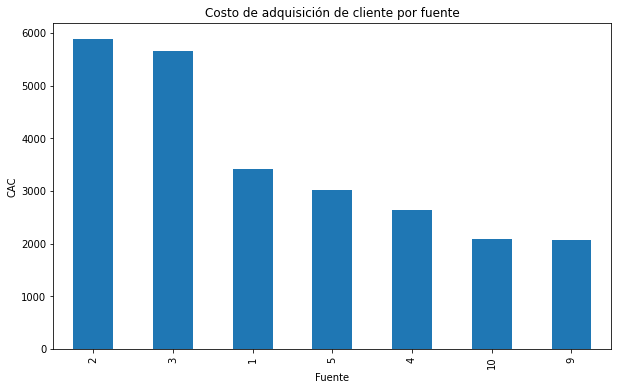

In [748]:
cost_buyer_user.groupby('source_id')['cac'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Costo de adquisición de cliente por fuente')
plt.xlabel('Fuente')
plt.ylabel('CAC')
plt.show()

De acuerdo al gráfico de barras, la fuente en la que mas se ha invertido para la adquisición de clientes es en la fuente 2 (16.29), y en la que menos se han realizado gastos para la adquisición de clientes es en laS fuentes 9 (6.84) y 10 (6.56).

**Hallamos el retorno de la inversión en marketing (ROMI) según la fuente.**

Inicialmente, unimos los dataframes buyers y orders para contar con toda la información de los compradores y los ingresos totales.

In [749]:
buyers=pd.merge(buyers,orders,on='uid',how='inner')

In [750]:
buyers

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id,buy_ts,revenue,buy_date,month_buy,buy_dt,order_month,buy_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,107 days,2,2018-01-03 21:51:00,0.55,2018-01-03,1,2018-01-03,2018-01-01,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0 days,10,2017-06-03 10:13:00,1.22,2017-06-03,6,2017-06-03,2017-06-01,2017-06-01
2,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0 days,10,2017-06-03 17:39:00,1.83,2017-06-03,6,2017-06-03,2017-06-01,2017-06-01
3,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0 days,3,2017-10-11 18:33:00,73.33,2017-10-11,10,2017-10-11,2017-10-01,2017-10-01
4,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,1 days,5,2018-01-28 15:54:00,2.44,2018-01-28,1,2018-01-28,2018-01-01,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50410,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0 days,3,2017-09-24 23:48:00,0.24,2017-09-24,9,2017-09-24,2017-09-01,2017-09-01
50411,18445407535914413204,2017-09-22 23:48:00,2017-09-22,2017-09-01,2017-09-22 23:55:00,2017-09-22,2017-09-01,0 days,3,2017-09-25 15:56:00,0.12,2017-09-25,9,2017-09-25,2017-09-01,2017-09-01
50412,18445601152732270159,2017-08-07 11:51:00,2017-08-07,2017-08-01,2018-03-26 22:54:00,2018-03-26,2018-03-01,231 days,2,2018-03-26 22:54:00,4.22,2018-03-26,3,2018-03-26,2018-03-01,2018-03-01
50413,18446156210226471712,2017-11-07 10:01:00,2017-11-07,2017-11-01,2018-02-18 19:34:00,2018-02-18,2018-02-01,103 days,3,2018-02-18 19:34:00,9.78,2018-02-18,2,2018-02-18,2018-02-01,2018-02-01


Creamos un bucle for que itere sobre las fuentes de marketing en el Dataframe buyers. Se crea además un nuevo dataframe que contenga los compradores por fuente de marketing (source_id) y el mes de la primera compra.

In [751]:
for source, df in buyers.groupby('source_id'):

            cohort_sizes_t = (
                buyers.query('source_id !=7')
            .groupby(['source_id', 'first_order_month'])
            .agg({'uid': 'nunique'}).reset_index()
        ) 

In [752]:
cohort_sizes_t.columns=['source_id','first_order_month','n_buyers']

In [753]:
cohort_sizes_t

,source_id,first_order_month,n_buyers
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340
...,...,...,...
80,10,2018-01-01,92
81,10,2018-02-01,123
82,10,2018-03-01,186
83,10,2018-04-01,107


Creamos otro Dataframe que agrupe los compradores por source_id, mes de primera compra y mes de compra en general y contenga los ingresos totales.

In [755]:
 cohorts_revenue_t = (
            buyers.groupby(['source_id', 'first_order_month', 'order_month'])
            .agg({'revenue': 'sum'})
            .reset_index()
        )

Renombramos los nombres de las columnas para éste nuevo dataframe.

In [756]:
cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']

Unimos los datos de los dataframes cohort_sizes_t y cohorts_revenue_t.

In [757]:
report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_order_month'])

Creamos una nueva columna, que contenga los meses que pasan desde la primera compra de cada cliente.

In [758]:
report_romi['age'] = (
            report_romi['order_month'] - report_romi['first_order_month']
        ) / np.timedelta64(1, 'M')

In [759]:
report_romi['age'] = report_romi['age'].round().astype('int') #redondeamos los valores de la columna "age" y se converten a enteros.

Hallamos el ltv (lifetime value) para cada source_id y mes de primera compra.

In [760]:
report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

Unimos información del dataframe report_romi, con los costos de marketing para cada fuente y mes.

In [761]:
report_romi=pd.merge(report_romi,costs.groupby(['source_id', 'cost_month']).agg({'costs': 'sum'}).reset_index(),
                       left_on=['source_id', 'first_order_month'], right_on=['source_id', 'cost_month'])

Eliminamos la columna "cost_month".

In [762]:
report_romi = report_romi.drop(['cost_month'], axis = 1) 

Hallamos el costo de adquisición por cliente para cada fuente y mes de primera compra.

In [763]:
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']

Hallamos el ROMI (retorno de inversión en marketing) para cada fuente y mes de primera compra.

In [764]:
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

Creamos la tabla dinámica, en la que se tome el romi como valores.

In [765]:
romi=report_romi.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)
romi.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.70,0.79,0.89,1.09,1.29,1.42,1.59,1.71,1.81,1.92,2.01,2.08
2017-07-01,0.73,0.78,0.94,1.01,1.05,1.08,1.11,1.13,1.17,1.2,1.23,
2017-08-01,0.67,0.73,0.81,0.86,0.93,0.96,1.0,1.07,1.12,1.15,,
2017-09-01,0.68,0.85,0.93,1.34,1.4,1.48,1.57,1.62,1.67,,,
2017-10-01,0.77,0.86,0.89,0.92,0.94,0.97,0.98,1.0,,,,
2017-11-01,0.71,0.76,0.8,0.85,0.87,0.88,0.9,,,,,
2017-12-01,0.61,0.65,0.79,0.96,1.0,1.04,,,,,,
2018-01-01,0.47,0.5,0.53,0.56,0.57,,,,,,,
2018-02-01,0.57,0.61,0.62,0.63,,,,,,,,


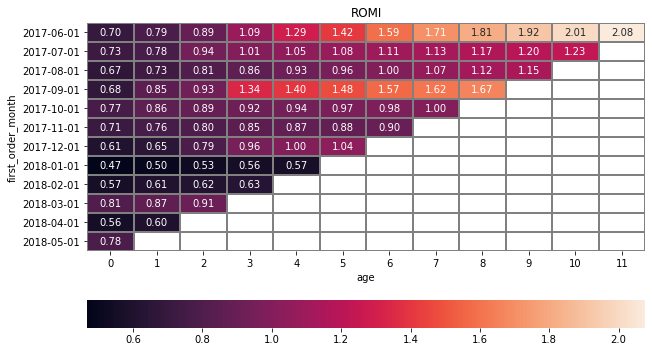

In [768]:
plt.figure(figsize=(10,6))
romi.index=romi.index.astype(str)
sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} ).set(title ='ROMI',yticklabels=romi.index.astype('str'))
plt.show()

De acuerdo con el mapa de calor, los mayores retornos de inversión de presentan en el mes de septiembre y junio (2017) y los mas bajos se reportan en los meses de enero y febrero (2018).

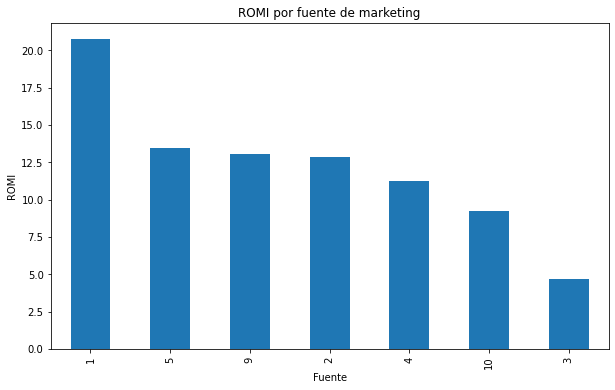

In [770]:
report_romi.groupby('source_id')['romi'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('ROMI por fuente de marketing')
plt.xlabel('Fuente')
plt.ylabel('ROMI')
plt.show()

De acuerdo al gráfico de barras, las fuentes de marketing en las que se obtienen mayores retornos de inversión corresponden a las fuentes 1 y 5. Por el contrario, las fuentes en las que se evidencian menores retornos de inversión corresponden a las fuentes de marketing 3 y 10.

**Analizamos como difieren los ingresos para varios dispositivos y fuentes de anuncios.**

In [352]:
visits=visits.sort_values(by='session_start_ts') # Ordenamos las visitas por fecha de inicio de sesión.

In [353]:
usuarios=visits.groupby('uid').first() #Agrupamos por usuario.

In [354]:
usuarios.head()

,device,session_end_ts,source_id,session_start_ts,visits_day,visits_week,visits_month,session_duration_sec,session_month,session_week,session_date
uid,,,,,,,,,,,
11863502262781,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,360,2018-03-01,9,2018-03-01
49537067089222,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01,120,2018-02-01,6,2018-02-06
297729379853735,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01,60,2017-06-01,23,2017-06-07
313578113262317,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01,1080,2017-09-01,38,2017-09-18
325320750514679,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01,540,2017-09-01,39,2017-09-30


In [355]:
ordenes_fuente=orders.merge(usuarios,on='uid',how='left') #Fusionamos los Dataframe ordenes y usuarios.

In [356]:
ordenes_fuente.head()

,buy_ts,revenue,uid,buy_date,month_buy,buy_dt,order_month,buy_month,device,session_end_ts,source_id,session_start_ts,visits_day,visits_week,visits_month,session_duration_sec,session_month,session_week,session_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,6,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017-06-01,2017-06-01,2017-06-01,120,2017-06-01,22,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,6,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,660,2017-06-01,22,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,6,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,540,2017-06-01,22,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,6,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017-06-01,2017-06-01,2017-06-01,1140,2017-06-01,22,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,6,2017-06-01,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017-06-01,2017-06-01,2017-06-01,1680,2017-06-01,22,2017-06-01


In [357]:
ordenes_fuente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   buy_ts                50415 non-null  datetime64[ns]
 1   revenue               50415 non-null  float64       
 2   uid                   50415 non-null  uint64        
 3   buy_date              50415 non-null  datetime64[ns]
 4   month_buy             50415 non-null  int64         
 5   buy_dt                50415 non-null  object        
 6   order_month           50415 non-null  datetime64[ns]
 7   buy_month             50415 non-null  datetime64[ns]
 8   device                50415 non-null  object        
 9   session_end_ts        50415 non-null  datetime64[ns]
 10  source_id             50415 non-null  int64         
 11  session_start_ts      50415 non-null  datetime64[ns]
 12  visits_day            50415 non-null  datetime64[ns]
 13  visits_week     

Obtenemos los ingresos, según el canal de marketing.

In [358]:
ingresos_fuente=ordenes_fuente.groupby('source_id')['revenue'].sum().sort_values(ascending=False).reset_index()

In [359]:
ingresos_fuente

,source_id,revenue
0,4,56696.83
1,3,54511.24
2,5,52624.02
3,2,46923.61
4,1,31090.55
5,9,5759.40
6,10,4450.33
7,7,1.22


Generamos un gráfico de barras, para visualizar los ingresos según la fuente.

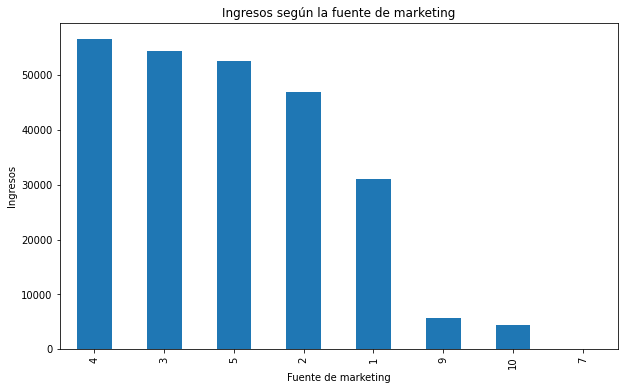

In [360]:
ordenes_fuente.groupby('source_id')['revenue'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Ingresos según la fuente de marketing')
plt.xlabel('Fuente de marketing')
plt.ylabel('Ingresos')
plt.show()

De acuerdo con el gráfico de barras, las fuentes en las que se generan mas ingresos corresponden a las fuentes 4,3 y 5 respectivamente. Las fuentes en las que se reportan menos ingresos corresponden a las fuentes 9 y 10.

**Revisamos como han variado éstos ingresos en el tiempo.**

In [361]:
ingresos_fuente_tiempo=ordenes_fuente.groupby(['month_buy','source_id'])['revenue'].sum().reset_index()

In [362]:
ingresos_fuente_tiempo

,month_buy,source_id,revenue
0,1,1,2554.82
1,1,2,2973.36
2,1,3,4716.02
3,1,4,4523.82
4,1,5,3961.83
...,...,...,...
80,12,3,6045.60
81,12,4,7526.25
82,12,5,14408.75
83,12,9,650.01


Generamos el gráfico que nos muestre la variación en los ingresos en el tiempo según la fuente.

In [363]:
fig_ingresos_fuente=px.area(ingresos_fuente_tiempo,x='month_buy',y='revenue',color='source_id',line_group='source_id')

In [364]:
fig_ingresos_fuente

De acuerdo al gráfico, los ingresos de la fuente 7 y 9 se han mantenido como los mas bajos. Para el caso de la fuente 2, obtuvo buen ingreso entre los meses de febrero (2) y marzo(3); sin embargo, se reportaron bajos ingresos para ésta fuente en los meses de junio y agosto. Los mayores ingresos se han reportado en las fuentes 4, 3 y 5, para éstas tres fuentes los mejores ingresos se obtuvieron en los meses de marzo (3) y octubre (10).

**Ahora obtenemos los ingresos totales, según el tipo de disposito.**

In [365]:
ingresos_dispositivo=ordenes_fuente.groupby('device')['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False)

In [366]:
ingresos_dispositivo

,device,revenue
0,desktop,211329.77
1,touch,40727.43


De acuerdo con el gráfico de barras, se generan mayores ingresos en los dispositivos tipo "desktop" (dispositivo tipo pc).

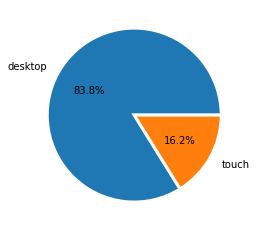

In [367]:
plt.pie(ingresos_dispositivo['revenue'],
       labels=['desktop','touch'],labeldistance=1.15,
       autopct='%1.1f%%',
       wedgeprops={'linewidth':3,'edgecolor':'white'})
plt.show()

De acuerdo al gráfico de pastel, la mayor cantidad de ingresos de obtiene por medio de los dispositivos tipo Desktop (84%)

**Revisamos como han variado los ingresos en el tiempo según el dispositivo utilizado.**

In [368]:
ingresos_dispositivo_tiempo= ordenes_fuente.groupby(['month_buy','device'])['revenue'].sum().reset_index()

In [369]:
ingresos_dispositivo_tiempo.head()

,month_buy,device,revenue
0,1,desktop,16344.38
1,1,touch,3072.75
2,2,desktop,21632.63
3,2,touch,3927.91
4,3,desktop,23295.06


In [370]:
fig_ingresos_dispositivo=px.area(ingresos_dispositivo_tiempo,x='month_buy',y='revenue',color='device',line_group='device')

In [371]:
fig_ingresos_dispositivo

De acuerdo con el gráfico, los mayores ingresos siempre se han reportado en los dispositivos tipo "desktop" a traves del tiempo. Los mayores ingresos se reportaron en los meses de marzo(3) y octubre(10).

# Conclusiones <a id='conclusiones'></a> 

Inicialmente se importan las librerías necesarias para la carga de datos y generación de gráficos.

Se importan los datos que contienen las visitas, los pedidos y los gastos generados en las actividades de marketing.

Se revisaron los tipos de datos y se decide cambiar los tipos de datos de las columnas "Start Ts" (Dataframe visits), "Buy Ts" (Dataframe orders) y "dt"(Dataframe costs). Para todas éstas columnas se cambia al tipo de dato tipo fecha para facilitar la manipulación y análisis de datos.

Se encuentra que el número de usuarios diarios es de 907 en promedio.

El número de usuarios activos en la semana es de 5724. La mayor cantidad de visitas semanales se realizan en los meses de noviembre y marzo. El menor número de visitas semanales, por el contrario se realizan en el mes de junio.

El número de usuarios activos en el mes es de apróximadamente 23228 usuarios.La mayor cantidad de visitas mensual por parte de los usuarios se realizan entre los meses de noviembre y diciembre. La menor cantidad de visitas mensuales se realizan en el mes de junio.

El número de sesiones por día es de 987. El mayor número de sesiones por día por parte de los usuarios se reportan entre los meses de noviembre y diciembre del 2017 y febrero 2018.

La mayoría de las sesiones duran apróximadamente 60 segundos (1 minuto), por lo cual se concluye que los usuarios abandonan la sesión muy rápido, es posible que la plataforma pida mucha información o sea dificil de usar.

La mayor cantidad de pedidos se realiza entre los meses de marzo y noviembre. La menor cantidad de pedidos por usuario se realiza en el mes de junio.

De acuerdo al cálculo de la moda, podemos concluir que la mayoría de las sesiones duran aproximadamente 60 segundos (1 minuto), por lo cual se concluye que los usuarios abandonan muy rápido la sesión, es posible que la plataforma pida mucha información o sea dificil de usar.

En general, la tasa de retención de la empresa se considera baja; ya que para todas las cohortes ésta tasa de retención es menor al 10% y tiene tendencia a disminuir en cada nueva cohorte.

De acuerdo al LTV acumulado para cada cohorte, los mayores ingresos totales por parte de los usuarios se registraron en las cohortes del mes de junio y septiembre.De acuerdo a la tabla dinámica que nos relaciona el LTV cada cohorte, identificamos que la cantidad de dinero aportado por los clientes generalmente va disminuyendo en el tiempo. 

La cantidad de dinero gastado en total en actividades de marketing es de 329131.62

De acuerdo al diagrama de líneas, la mayor cantidad de costos se han reportado en el mes de diciembre, y por el contrario la menor cantidad de costos se reportan en el mes de agosto.

De acuerdo al diagrama de barras que nos muestra la cantidad de dinero gastado en marketing por cada fuente, evidenciamos que en la fuente 3 es en la que mas se ha invertido dinero. En la fuente 9 en la que menos se ha gastado dinero en actividades de marketing.

La fuente en la que mas se generan gastos por mes es en la fuente 3, teniendo los mayores gastos en el mes de noviembre del 2017.

De acuerdo al gráfico de barras, la fuente en la que mas se ha invertido para la adquisición de clientes es en la fuente 2 (16.29), y en la que menos se han realizado gastos para la adquisición de clientes es en laS fuentes 9 (6.84) y 10 (6.56).

De acuerdo con el mapa de calor, los mayores retornos de inversión de presentan en el mes de septiembre y junio (2017) y los mas bajos se reportan en los meses de enero y febrero (2018).

Las fuentes de marketing en las que se obtienen mayores retornos de inversión corresponden a las fuentes 1 y 5. Por el contrario, las fuentes en las que se evidencian menores retornos de inversión corresponden a las fuentes de marketing 3 y 10.

De acuerdo con el gráfico de barras, las fuentes en las que se generan mas ingresos corresponden a las fuentes 4,3 y 5 respectivamente. Las fuentes en las que se reportan menos ingresos corresponden a las fuentes 9 y 10.

Los ingresos de la fuente 7 y 9 se han mantenido como los más bajos. Para el caso de la fuente 2, obtuvo buen ingreso entre los meses de febrero (2) y marzo(3); sin embargo, se reportaron bajos ingresos para ésta fuente en los meses de junio y agosto. Los mayores ingresos se han reportado en las fuentes 4, 3 y 5, para éstas tres fuentes los mejores ingresos se obtuvieron en los meses de marzo (3) y octubre (10)

De acuerdo con los datos, los mayores ingresos se reportan en las compras por medio de dispositivos tipo “desktop”, teniendo en cuenta que el 84% de los ingresos se realizan por medio de éstos dispositivos.


Los mayores ingresos siempre se han reportado en los dispositivos tipo "desktop" a traves del tiempo. Los mayores ingresos se reportaron en los meses de marzo y octubre.

**Conclusiones de marketing**

Se recomienda aumentar la inversión en la fuente 4; ya que es la fuente de la que mas ingresos se están obteniendo.

No se recomienda aumentar inversión en la fuente 9, ya que es de las fuentes de las que menos se están obteniendo ingresos.

Se recomienda disminuir los gastos de marketing para la fuente 3, ya que es en la fuente que mas se invierte y no es precisamente de la que mas se están obteniendo ganancias y/o ingresos.

De acuerdo con los resultados de la tasa de retención, el equipo de marketing debe generar mayor satisfacción en los clientes para aumentar éstas tasas de retención, posiblemente es necesario simplificar a los usuarios la manipulación de la plataforma o automatizar más los procesos. 